In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.calibration import CalibratedClassifierCV
import gc
from sklearn.preprocessing import LabelEncoder


In [2]:
from scipy.stats import norm
import matplotlib.pylab as plat 
def plot_graph(dataset,col):
    if(dataset[col].dtypes != 'object'):
        plt.figure(figsize=(10,10))
        try:
            sns.distplot(dataset[col].dropna(),color='blue',kde=True)
        except RuntimeError as re:
            if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
                sns.distplot(dataset[col].dropna(),color='blue',kde=True,kde_kws={'bw' :1.5})
            else:
                raise re
        plt.show()
        print("There are {} unique values ".format(len(dataset[col].unique())))
        print(dataset[col].value_counts().head())
    else:
        plt.figure(figsize=(20,20))
        temp = pd.DataFrame()
        temp[col] = dataset[col].dropna()
        sns.catplot(x=col,data=temp,kind='count')
        plat.xticks(rotation=90)
        del (temp)
        plt.legend()
        plt.show()
        print("There are {} unique values ".format(len(dataset[col].unique())))
        print(dataset[col].value_counts().head()) 

In [3]:
data = pd.read_csv('/content/drive/MyDrive/home loan project /apptrain_data')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_1,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,...,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_2,SK_DPD_DEF_2,NAME_CONTRACT_STATUS_Approved_2,NAME_CONTRACT_STATUS_Completed_2,NAME_CONTRACT_STATUS_Demand_2,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed_2,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,MONTHS_BALANCE,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,-1.0,1,0,1,1,0,8,1.0,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1437.0,0.0,-1072.0,-4185.0,5043.645,0.0,108131.945625,30722.625,3998.570625,0.0,3.0,-1185.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,-47.0,27.0,0.0,0.0,0.0,0.0,23.0,15.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,-1.0,1,0,1,1,0,3,2.0,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2586.0,0.0,-2434.0,-3292.0,0.000,0.0,254350.125000,0.000,202500.000000,0.0,3.0,-2131.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,0,8,1.0,2,1,9,0,0,0,0,0,0,11,0.505998,0.555912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1326.0,0.0,-595.0,-1065.0,0.000,0.0,94518.900000,0.000,0.000000,0.0,3.0,-682.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,-1.0,1,0,1,0,0,8,2.0,2,6,17,0,0,0,0,0,0,5,0.505998,0.650442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,-1.0,1,0,1,0,0,3,1.0,2,4,11,0,0,0,0,1,1,37,0.505998,0.322738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1149.0,0.0,-783.0,-783.0,0.000,0.0,146250.000000,0.000,0.000000,0.0,3.0,-783.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


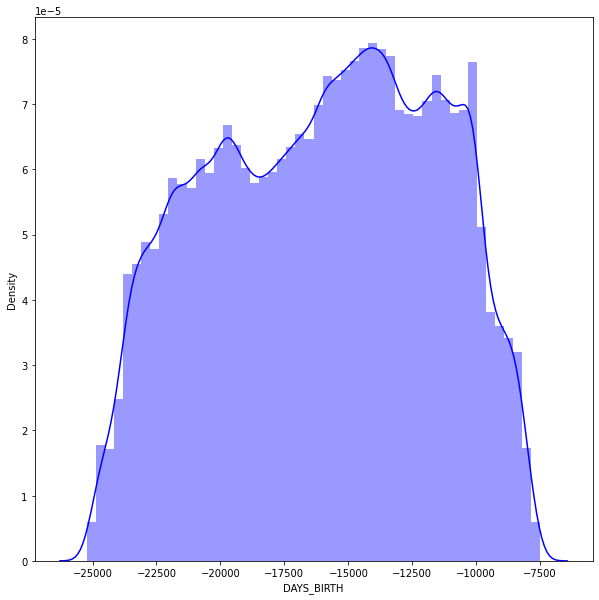

There are 17460 unique values 
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
Name: DAYS_BIRTH, dtype: int64


In [4]:
plot_graph(data,'DAYS_BIRTH')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


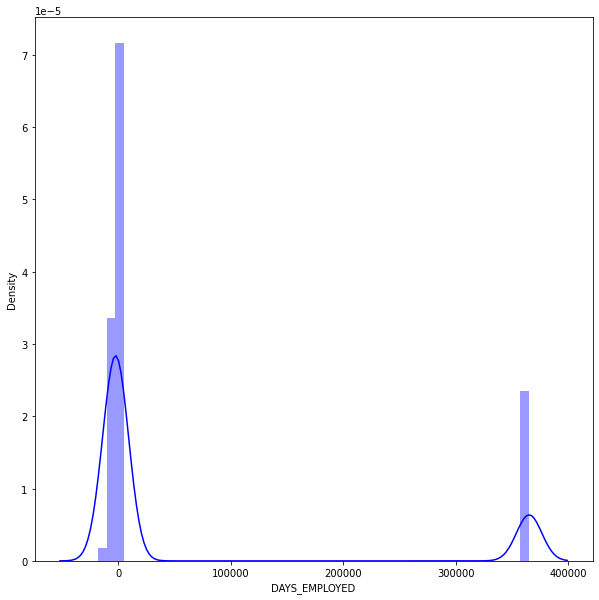

There are 12574 unique values 
 365243    55374
-200         156
-224         152
-199         151
-230         151
Name: DAYS_EMPLOYED, dtype: int64


In [5]:
plot_graph(data,'DAYS_EMPLOYED')

In [6]:
# here 365243 days is an outlier  we have to remove it as this much days are equals to 1000 years 
error = data[data['DAYS_EMPLOYED'] == 365243]
print('The no of errors are :', len(error))
(error['TARGET'].value_counts()/len(error))*100
# Create an error flag column
data['DAYS_EMPLOYED_ERROR'] = data["DAYS_EMPLOYED"] == 365243
# Replace the error values with nan
data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# created a separate column "DAY_EMPLOYED_ERROR" which flags error

The no of errors are : 55374


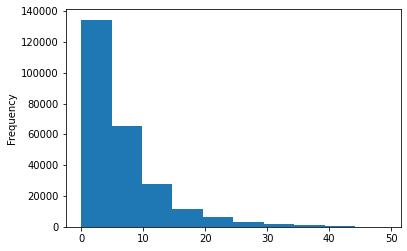

In [7]:
(data['DAYS_EMPLOYED']/(-365)).plot.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


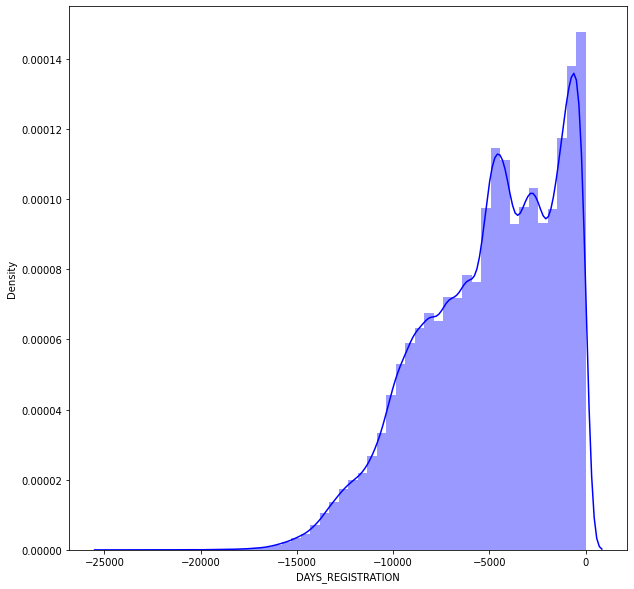

There are 15688 unique values 
-1.0    113
-7.0     98
-6.0     96
-2.0     92
-4.0     92
Name: DAYS_REGISTRATION, dtype: int64


In [8]:
plot_graph(data,'DAYS_REGISTRATION')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


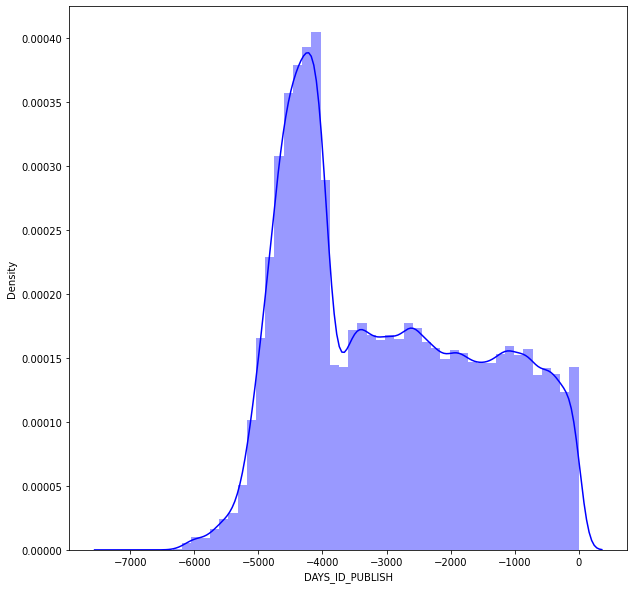

There are 6168 unique values 
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: DAYS_ID_PUBLISH, dtype: int64


In [9]:
plot_graph(data,'DAYS_ID_PUBLISH')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


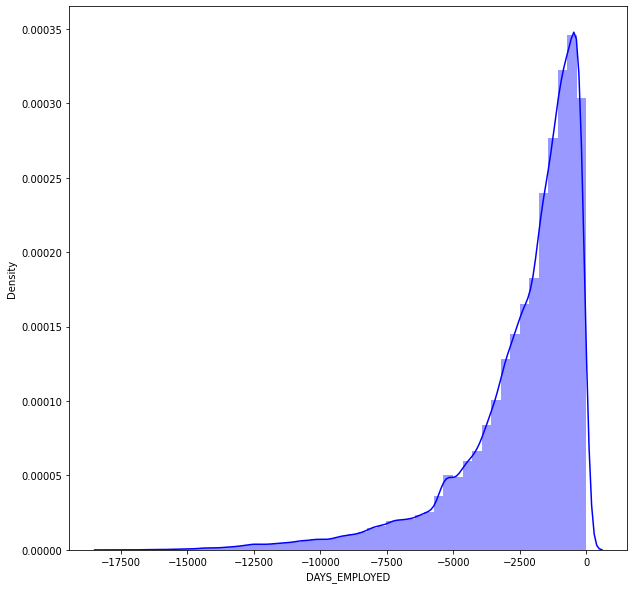

There are 12574 unique values 
-200.0    156
-224.0    152
-230.0    151
-199.0    151
-212.0    150
Name: DAYS_EMPLOYED, dtype: int64


In [10]:
plot_graph(data,'DAYS_EMPLOYED')

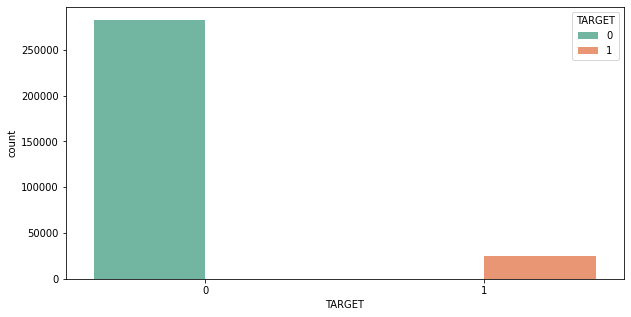

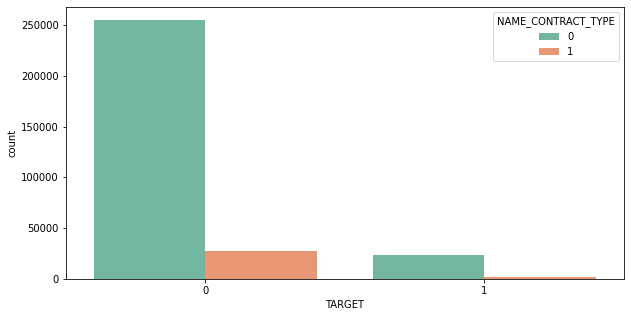

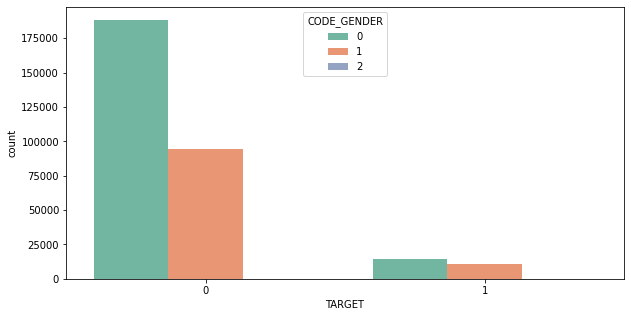

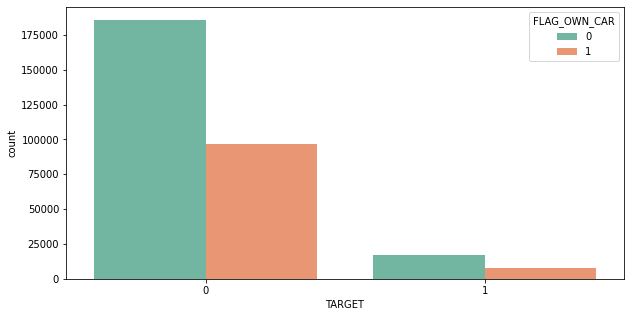

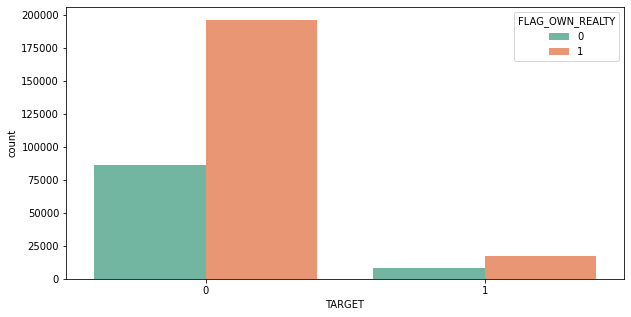

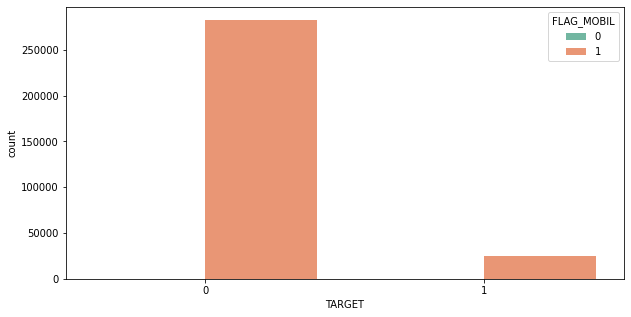

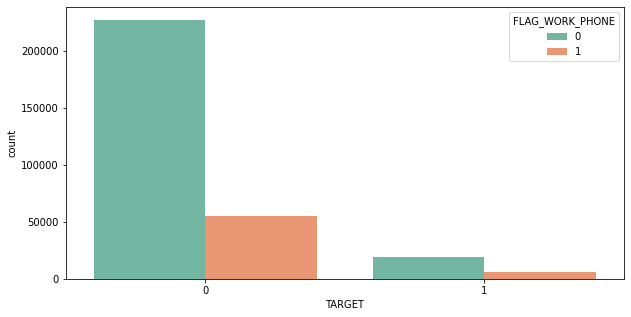

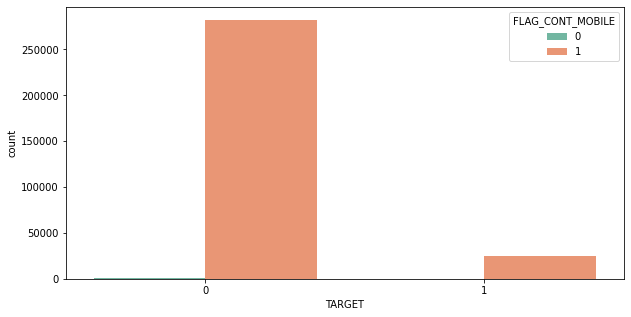

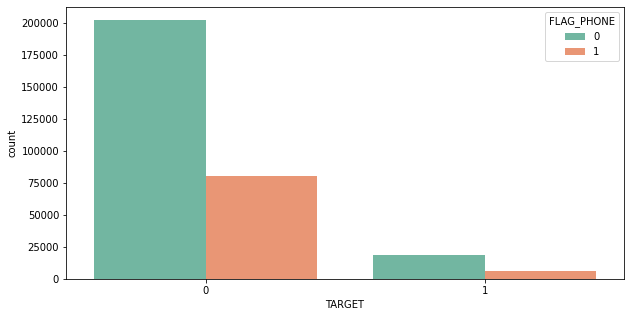

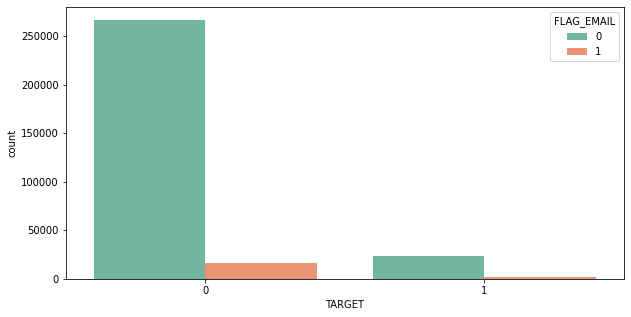

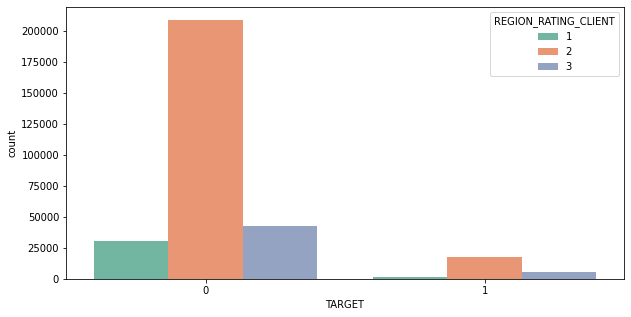

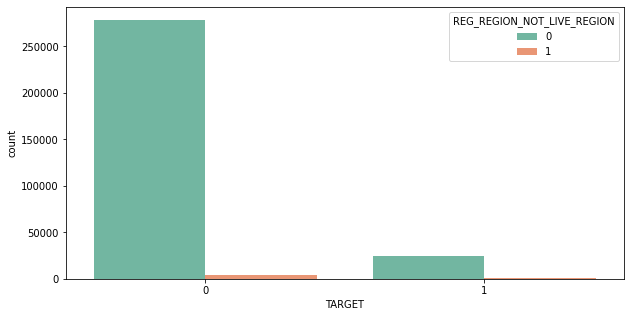

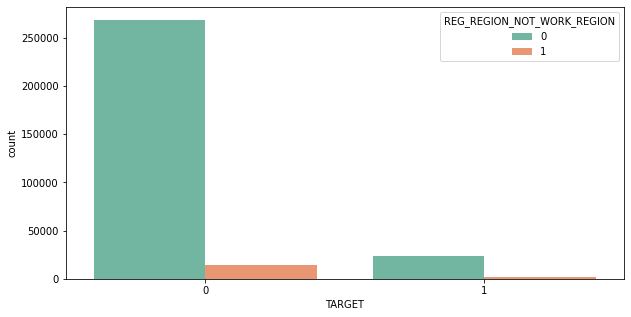

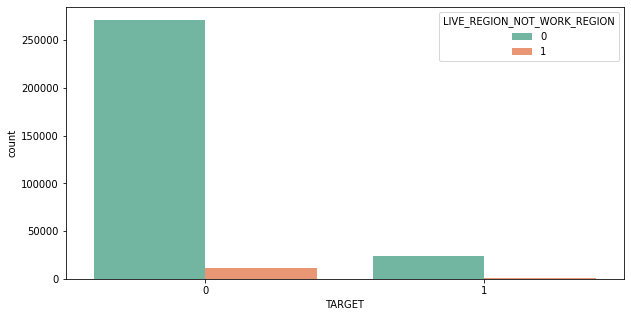

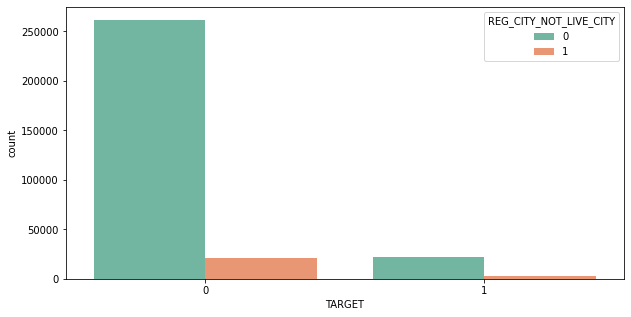

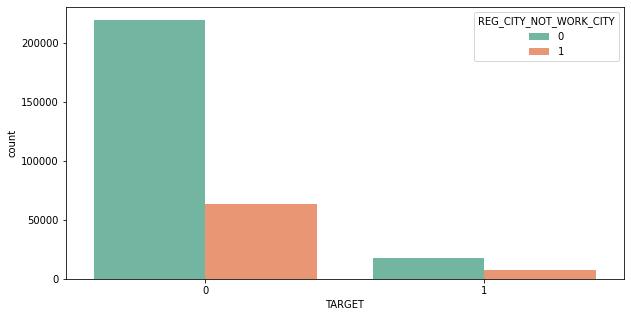

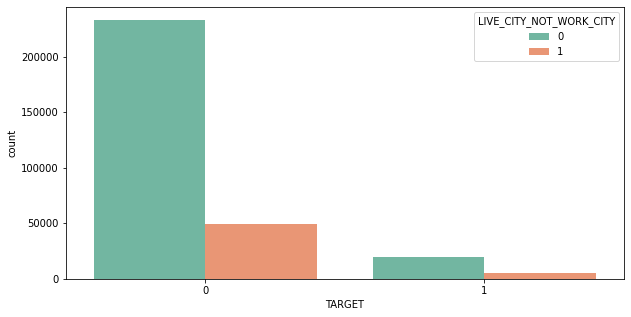

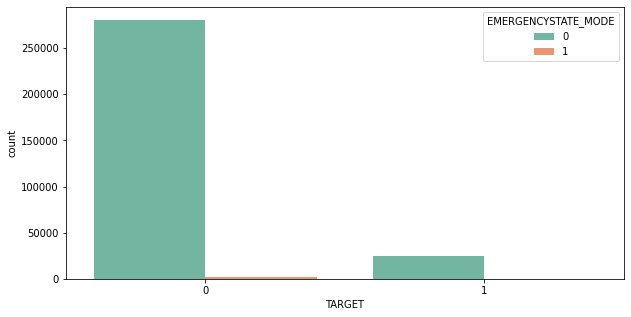

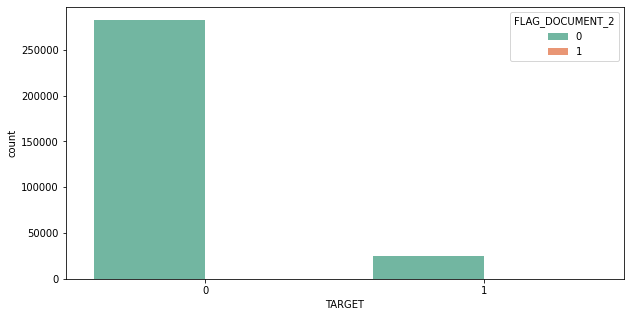

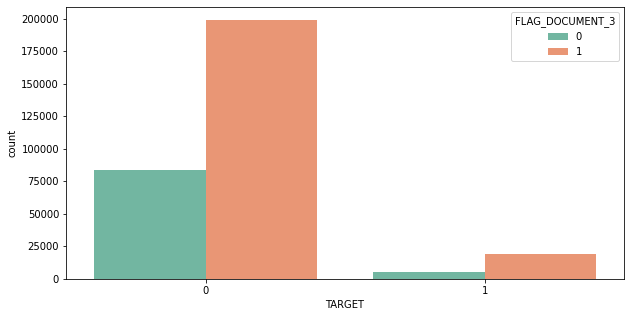

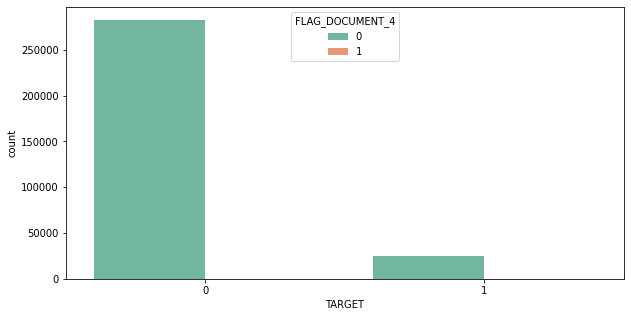

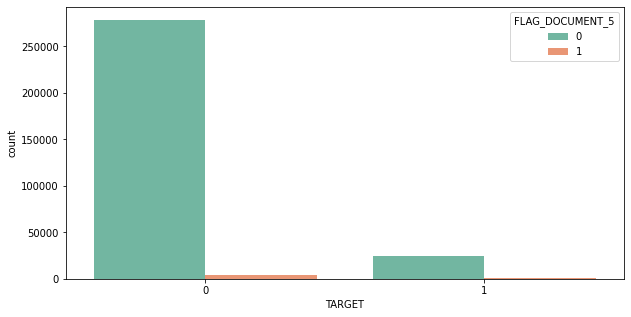

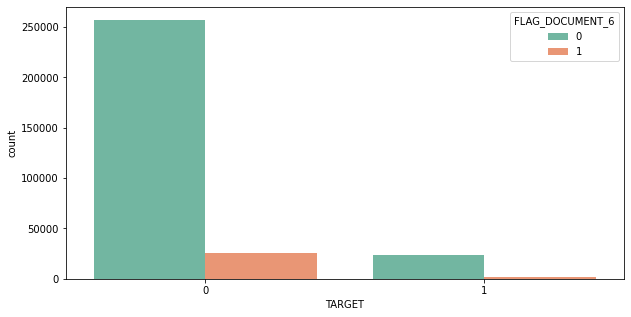

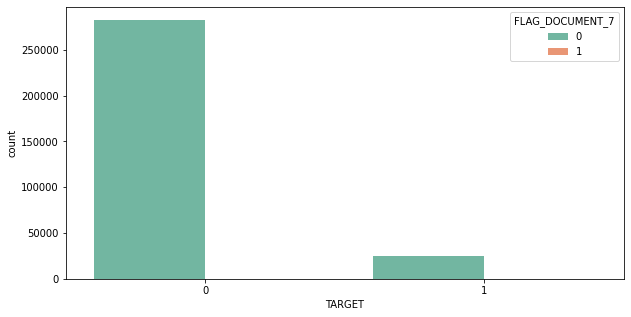

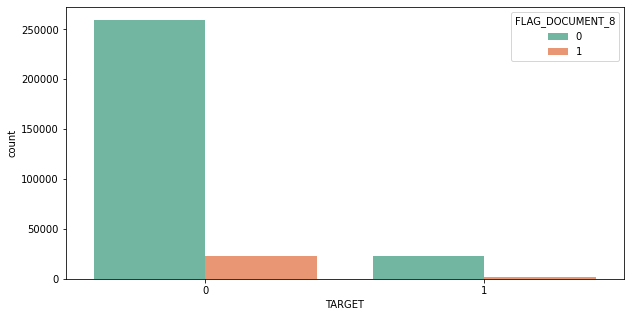

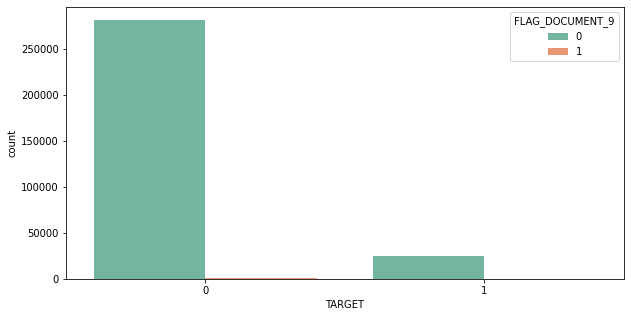

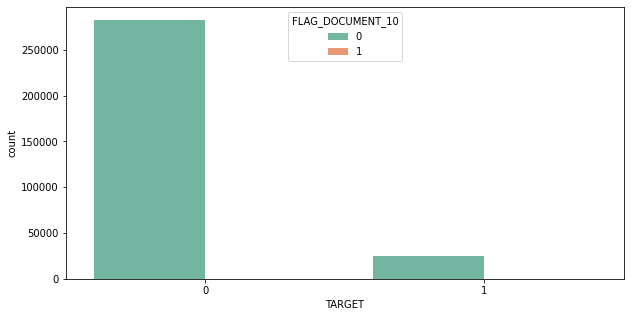

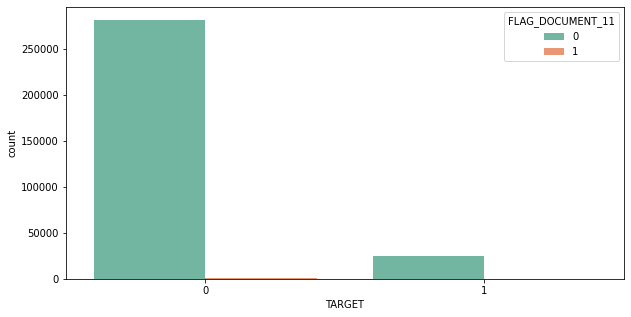

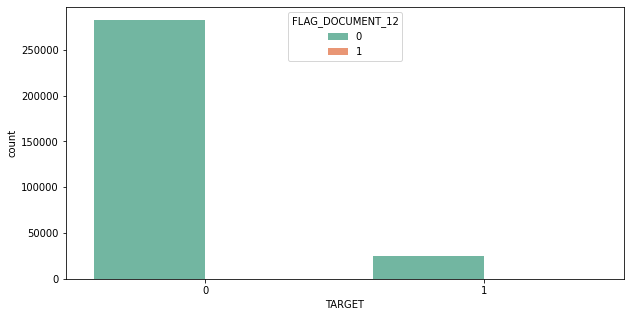

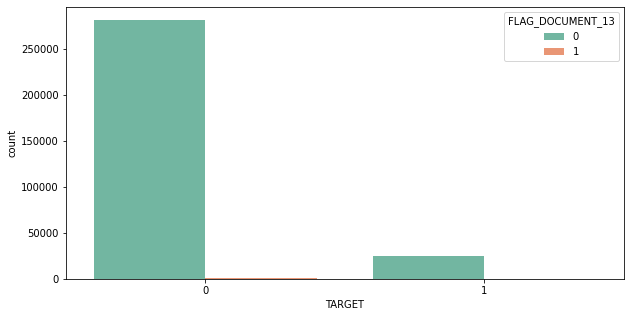

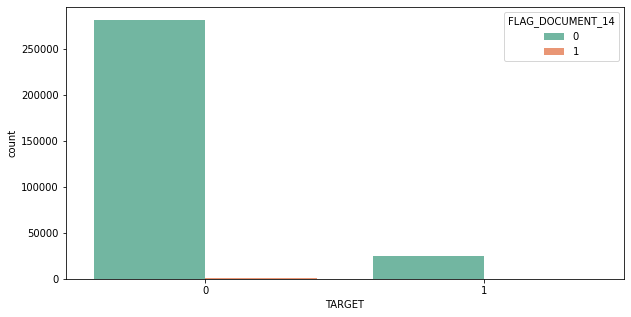

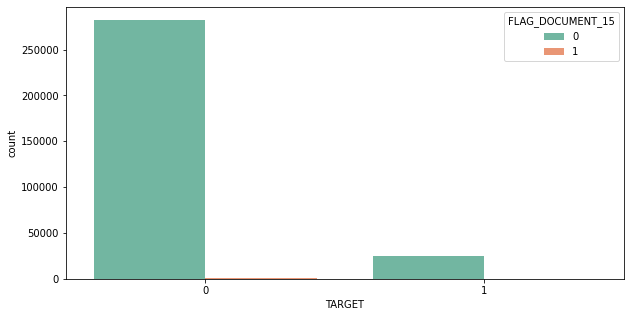

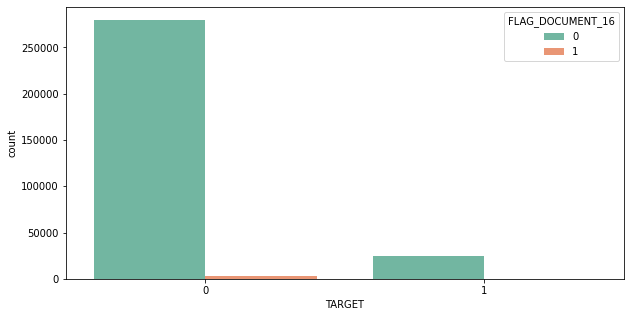

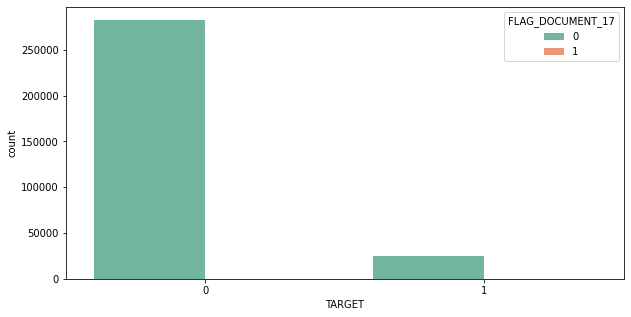

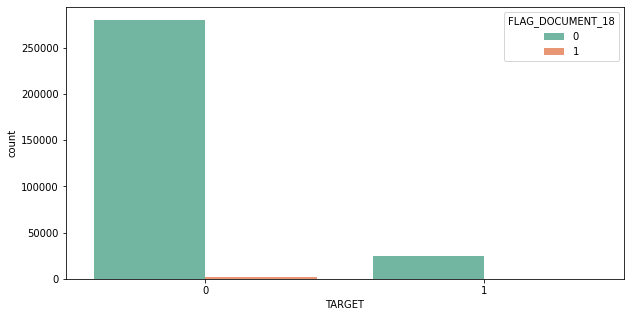

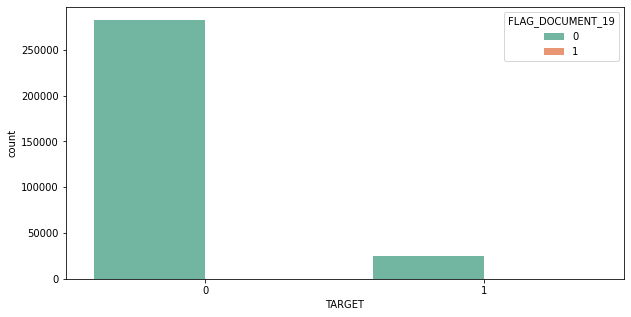

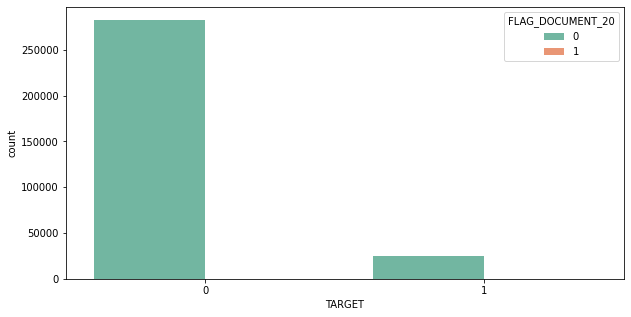

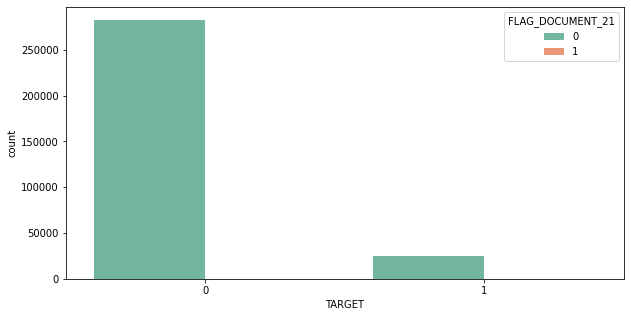

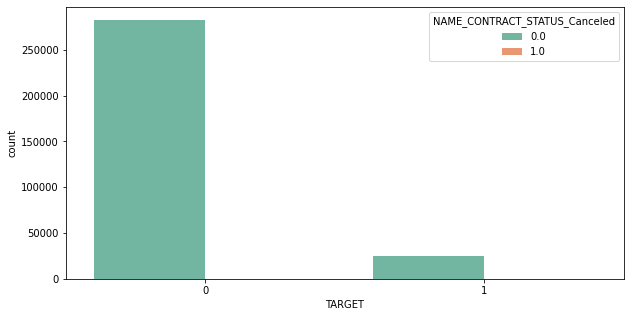

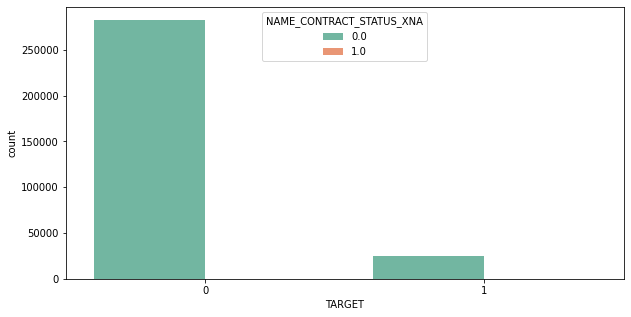

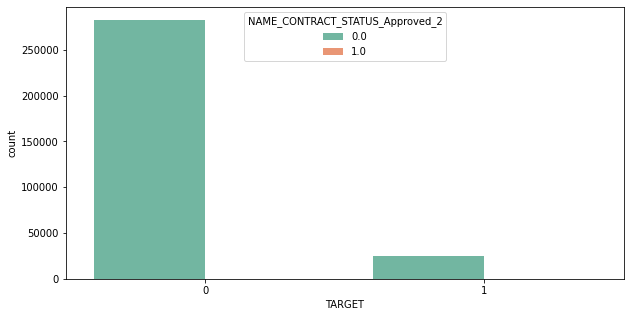

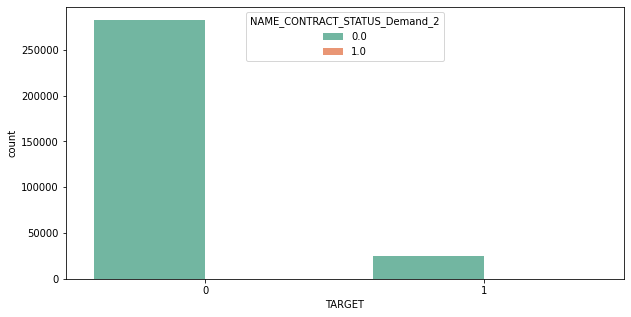

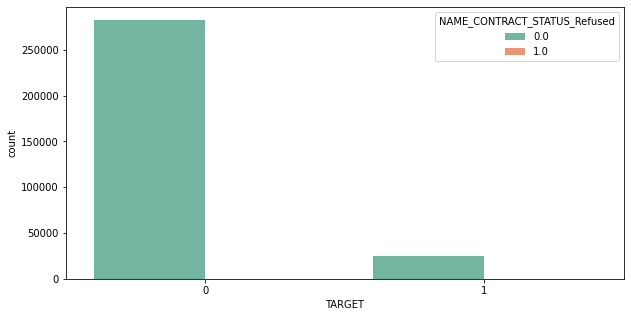

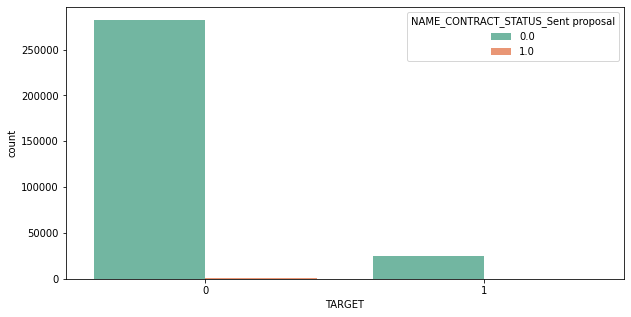

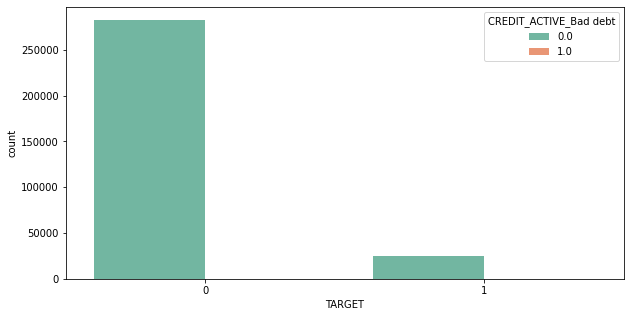

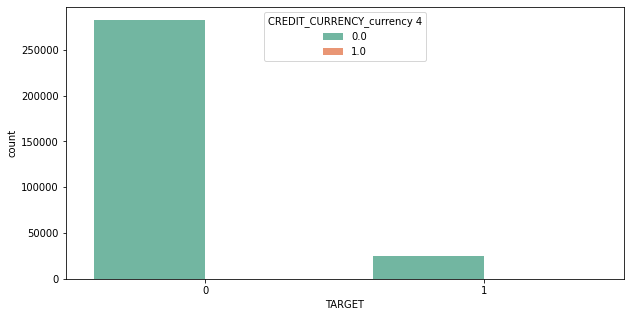

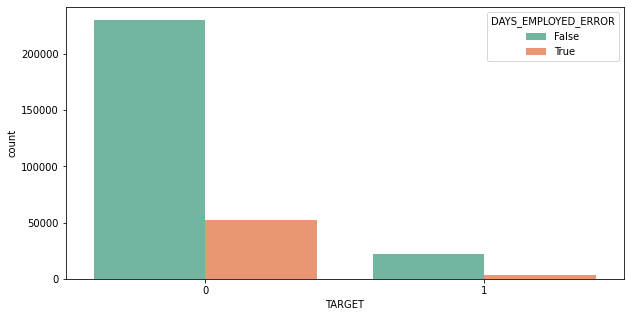

In [18]:
data=data.drop(columns=['SK_ID_CURR'])
for i in data:
    if (len(data[i].unique())<=3 and not data[i].dtype=='object'):
        plt.figure(figsize=(10,5))
        sns.countplot(data=data,x='TARGET',hue=i,palette="Set2")
        plt.show()